In [30]:
import pandas as pd
import category_encoders as ce
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
wine_data = pd.read_csv('data/wine_cleared.csv')

In [32]:
# для удобства сразу преобразуем признак в int
wine_data['price_round'] = wine_data['price'].round().astype(int)

In [33]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
wine_data['year'] = wine_data['title'].str.findall(regex).str.get(0)
wine_data['year'] = pd.to_datetime(wine_data['year'], errors='coerce')
wine_data['year']


0        2013-01-01
1        2011-01-01
2        2013-01-01
3        2013-01-01
4        2012-01-01
            ...    
129966   2013-01-01
129967   2004-01-01
129968   2013-01-01
129969   2012-01-01
129970   2012-01-01
Name: year, Length: 129971, dtype: datetime64[ns]

In [34]:
wine_data['years_diff'] = (pd.to_datetime('2022-01-12') - wine_data['year']).dt.days
wine_data['years_diff'].max()

98627.0

In [35]:
wine_data['is_usa'] = wine_data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [36]:
wine_data['is_france'] = wine_data['country'].apply(lambda x: 1 if x == 'France' else 0)
wine_data['is_italy'] = wine_data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [37]:
wine_data['year'] = wine_data['year'].dt.year
wine_data['old_wine'] = wine_data['year'].apply(lambda x: 1 if x < 2010 else 0)

In [38]:
wine_data['locality'] = wine_data['title'].str.findall('[(]([\w\s]*)[)]').str.get(0)

In [39]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

In [40]:
wine_data = wine_data.join(country_population.set_index('country'), on='country')

In [41]:
country_area = pd.read_csv('data/country_area.csv', sep=';')

In [42]:
wine_data = wine_data.join(country_area.set_index('country'), on='country')

In [43]:
wine_data['year'] = wine_data['year'].astype(object)
ord_encoder = ce.OrdinalEncoder()
wine_data['year'] = ord_encoder.fit_transform(wine_data['year'])

In [44]:
encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(wine_data['taster_name'])
wine_data = pd.concat([wine_data, type_bin], axis=1)

c:\Users\Люля\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


In [45]:
bin_encoder = ce.BinaryEncoder(cols=['country'])
country_bin = bin_encoder.fit_transform(wine_data['country'])
wine_data = pd.concat([wine_data, country_bin], axis=1)

In [46]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
twitter_bin = bin_encoder.fit_transform(wine_data['taster_twitter_handle'])
wine_data = pd.concat([wine_data, twitter_bin], axis=1)

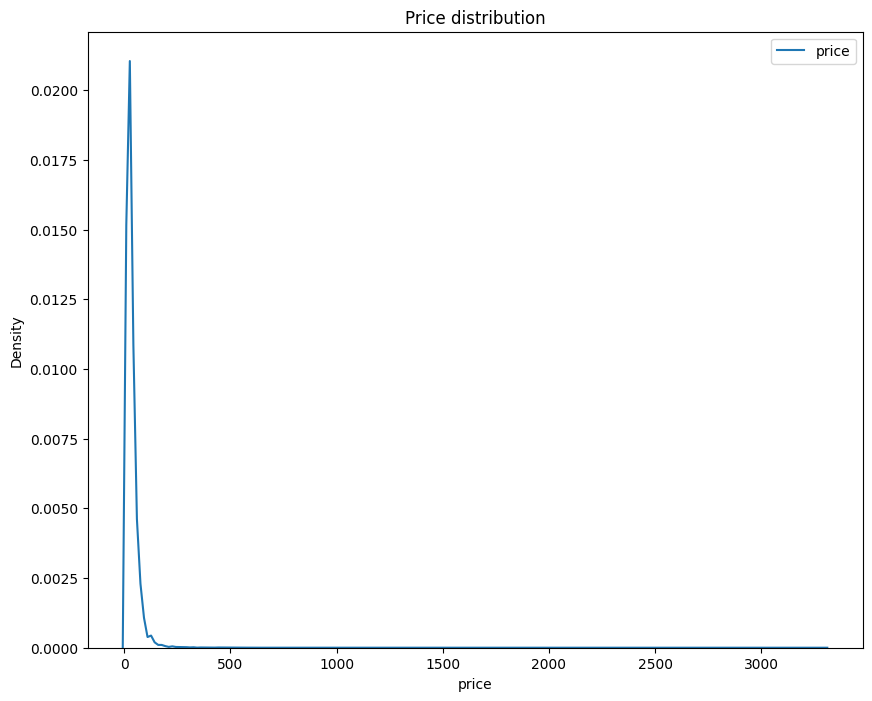

In [47]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Price distribution')
sns.kdeplot(wine_data['price'], ax=ax1, label ='price')
plt.legend()

In [48]:
#r_scaler = preprocessing.RobustScaler()
#wine_data['price'] = pd.DataFrame(r_scaler.fit_transform(wine_data[['price']]))

In [49]:
#s_scaler = preprocessing.StandardScaler()
#wine_data['price'] = pd.DataFrame(s_scaler.fit_transform(wine_data[['price']]))

In [51]:
wine_data = wine_data.drop(['area','is_usa','is_italy','is_france', 'taster_name_20', 'price_round'], axis=1)

C:\Users\Люля\AppData\Local\Temp\ipykernel_2896\1077056704.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine_data.corr(), annot = True, linewidths=.5, ax=ax)


<AxesSubplot: >

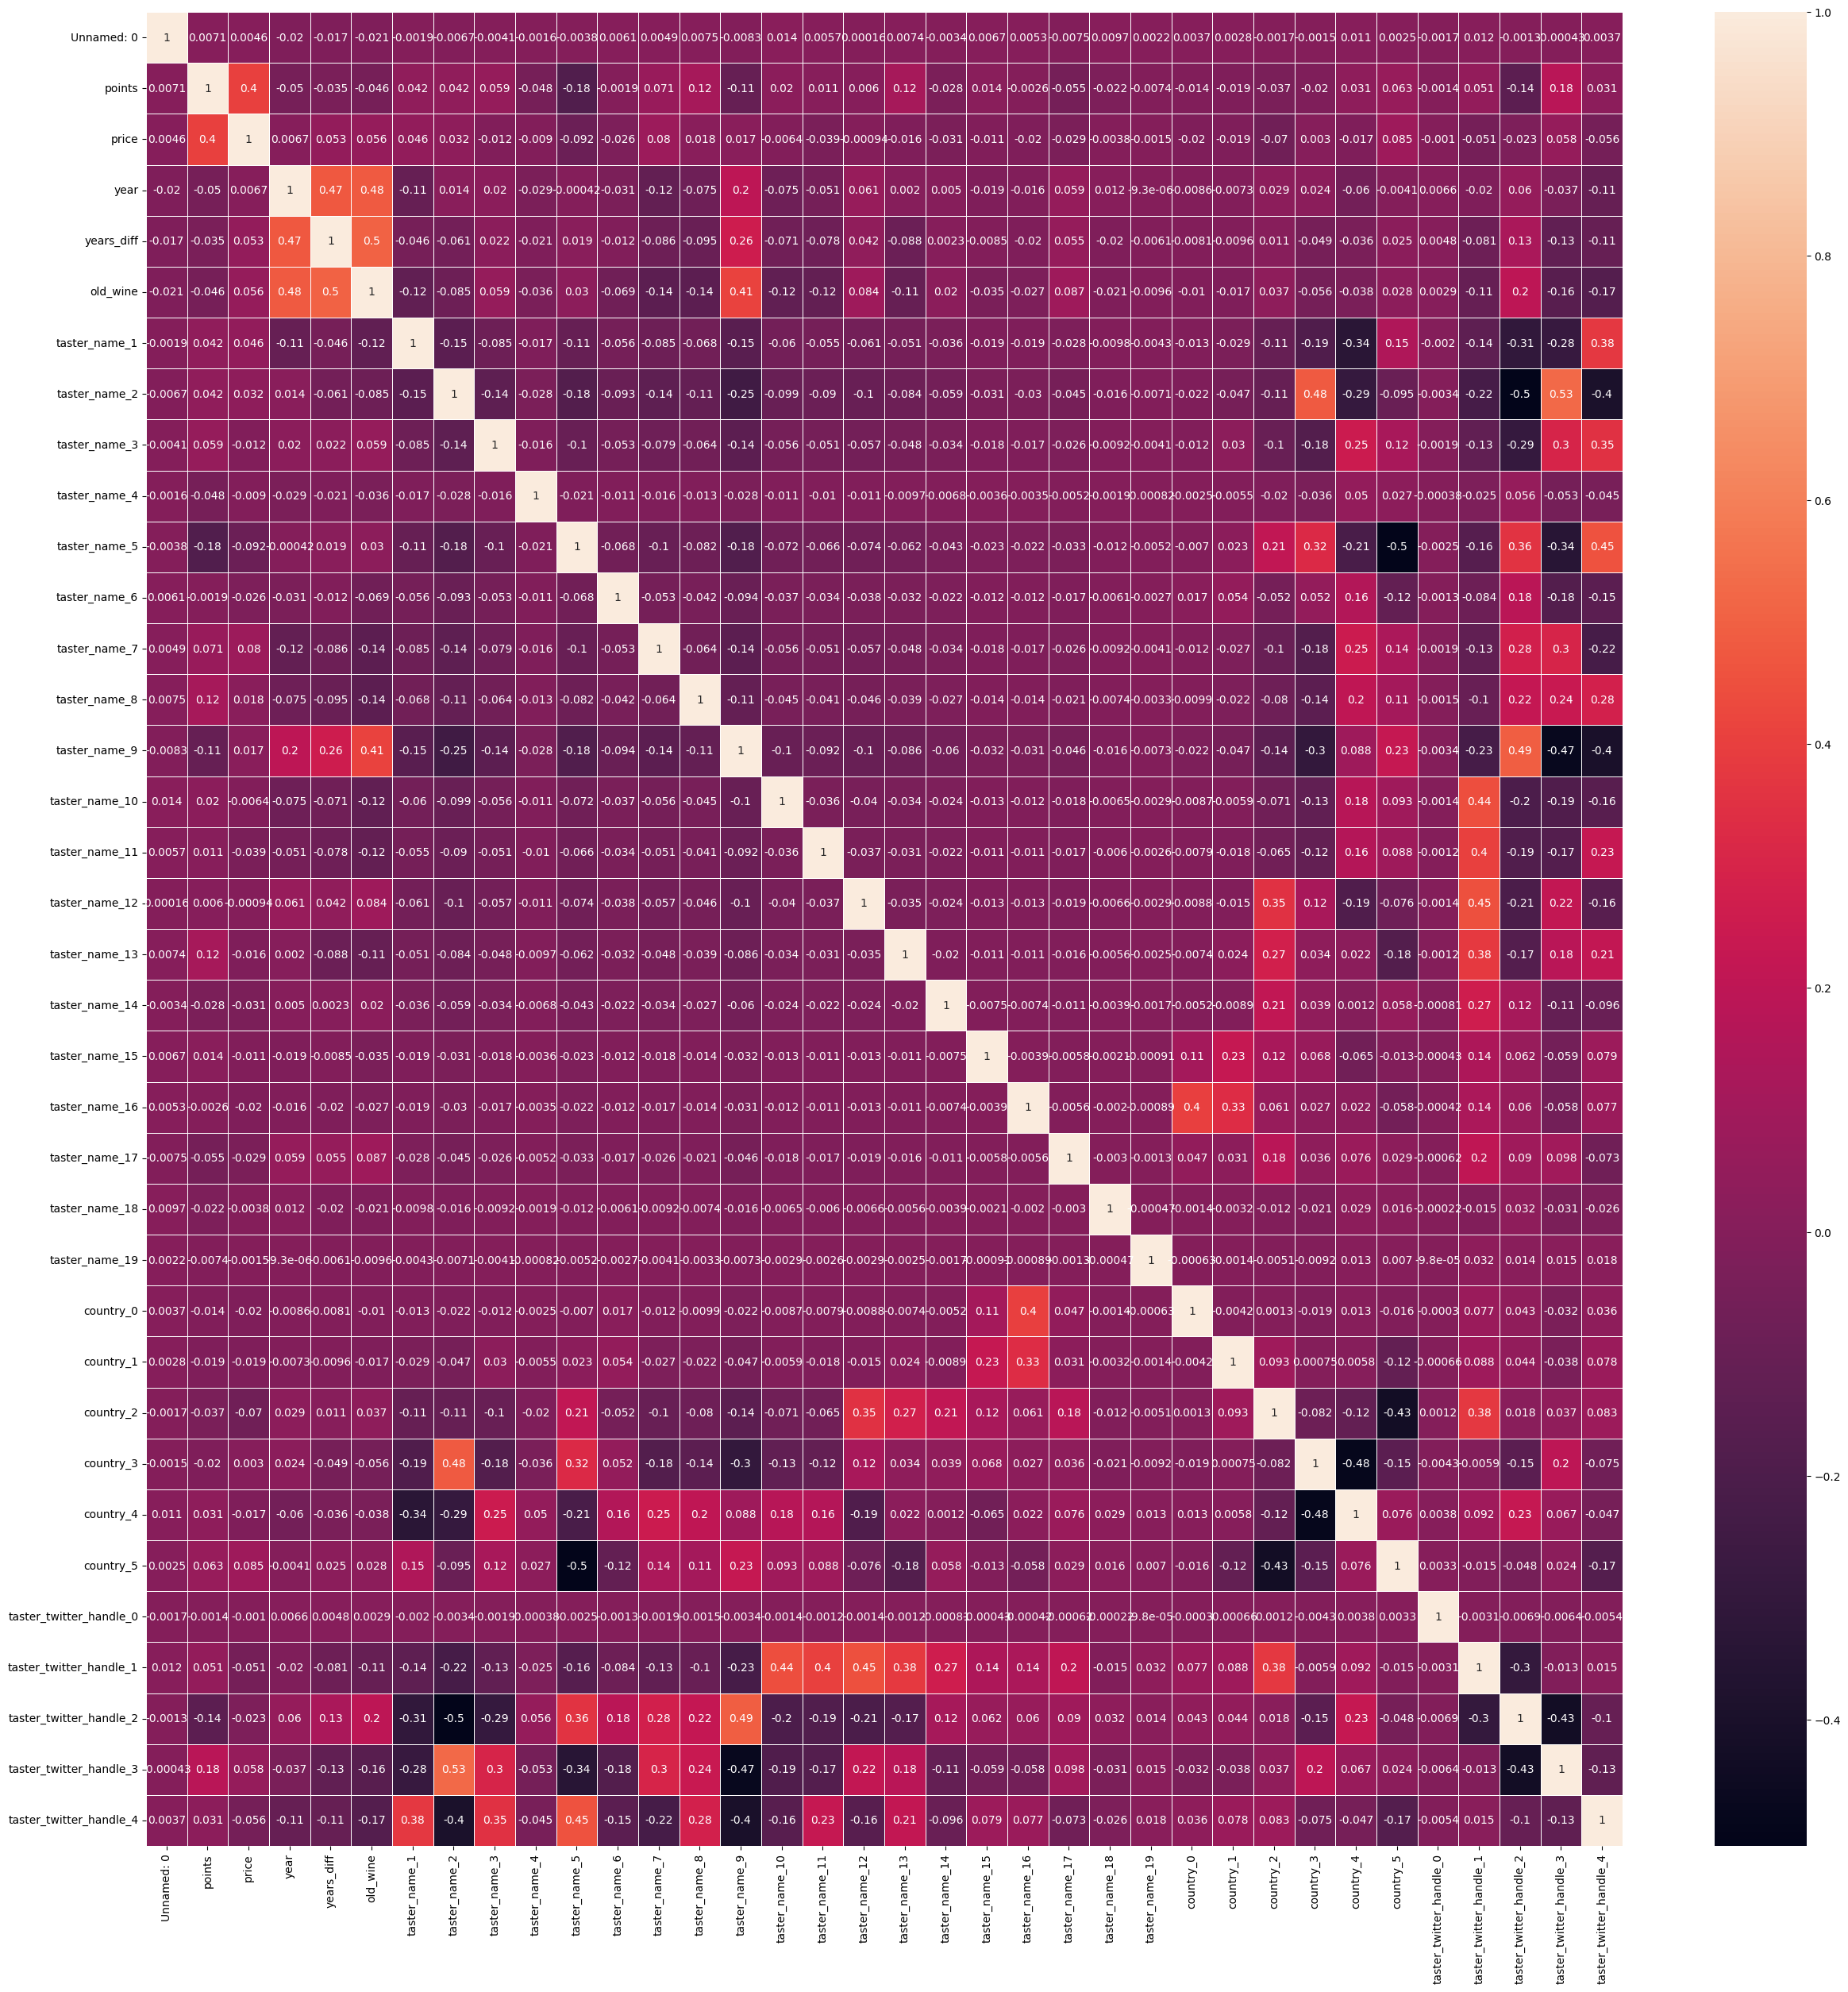

In [52]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(wine_data.corr(), annot = True, linewidths=.5, ax=ax)